## Career Advisor 

In [67]:
import pandas as pd
df=pd.read_csv('future_career_advice_dataset.csv')
df.head()

,Age,Gender,Education_Level,Current_Field,Mathematical_Skills,Communication_Skills,Coding_Knowledge,Creativity_Level,Analytical_Thinking,Leadership_Skills,...,Internship_Experience,Freelance_Experience,Job_Experience_Years,Certifications_Completed,Extracurricular_Activities,Risk_Taking_Ability,Teamwork_Individual_Pref,Stress_Handling_Ability,Adaptability_to_New_Tech,Best_Suited_Profession
0,24,Other,Diploma,Science,1,3,No,2,5,7,...,4,No,19,1,Yes,10,Individual,5,9,Entrepreneur
1,37,Other,High School,Medicine,2,10,Yes,4,4,10,...,4,Yes,6,8,No,2,Teamwork,4,2,Doctor
2,46,Other,Master’s,Medicine,8,1,Yes,7,2,8,...,1,Yes,8,5,No,7,Individual,2,3,Business Analyst
3,32,Female,High School,Science,1,3,No,6,1,2,...,3,Yes,9,0,Yes,6,Individual,2,6,Artist
4,28,Other,High School,Business,3,2,No,4,7,10,...,2,Yes,8,0,No,10,Teamwork,10,7,Research Scientist


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



# Define categorical columns (excluding target variable)
categorical_cols = ['Gender', 'Education_Level', 'Current_Field', 'Interest_Area', 
                    'Work_Preference', 'Work_Environment', 'Self_Employment_Interest', 
                    'Entrepreneurial_Mindset', 'Teamwork_Individual_Pref', 'Technical_Experience',
                    'Research_Writing_Skills', 'Problem_Solving_Skills', 'Leadership_Skills',
                    'Creativity_Level', 'Coding_Knowledge', 'Mathematical_Skills',	
                    'Communication_Skills', 'Analytical_Thinking', 'Freelance_Experience',
                    'Extracurricular_Activities', 'Risk_Taking_Ability', 'Stress_Handling_Ability',
                    'Adaptability_to_New_Tech']
numeric_cols = [

'Age','Job_Experience_Years','Certifications_Completed',


]

# Separate target variable
target_col = 'Best_Suited_Profession'
y = df[target_col]  # Store the target column separately

# Apply One-Hot Encoding correctly
one_hot_encode = pd.get_dummies(df[categorical_cols], drop_first=True)  # `drop_first=True` to avoid multicollinearity

#  Concatenate the original DataFrame with the encoded features
df_encoded = pd.concat([df.drop(columns=categorical_cols + [target_col]), one_hot_encode], axis=1)

# Display the first 3 rows of the transformed dataset
df_encoded = df_encoded.astype(int)
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
df_encoded.head(20)


,Age,Job_Experience_Years,Certifications_Completed,Gender_Male,Gender_Other,Education_Level_Diploma,Education_Level_High School,Education_Level_Master’s,Education_Level_PhD,Current_Field_Business,...,Analytical_Thinking_Low,Analytical_Thinking_Medium,Freelance_Experience_Yes,Extracurricular_Activities_Yes,Risk_Taking_Ability_Low,Risk_Taking_Ability_Medium,Stress_Handling_Ability_Low,Stress_Handling_Ability_Medium,Adaptability_to_New_Tech_Low,Adaptability_to_New_Tech_Medium
0,24,6,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,37,6,8,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
2,46,8,5,0,1,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
3,32,9,0,0,0,0,1,0,0,0,...,1,0,1,1,0,1,1,0,0,1
4,28,8,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
5,25,7,7,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
6,46,4,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
7,38,8,8,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
8,24,2,8,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
9,43,6,8,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Train RandomForest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print("Model Training Complete!")


Model Training Complete!


In [66]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1

Classification Report:
                      precision    recall  f1-score   support

             Artist       0.12      0.15      0.13       207
   Business Analyst       0.11      0.11      0.11       200
     Data Scientist       0.10      0.09      0.09       207
   Digital Marketer       0.09      0.12      0.11       219
             Doctor       0.11      0.11      0.11       217
       Entrepreneur       0.07      0.05      0.06       208
             Lawyer       0.10      0.11      0.10       179
Mechanical Engineer       0.06      0.05      0.06       177
 Research Scientist       0.11      0.11      0.11       187
  Software Engineer       0.10      0.09      0.10       199

           accuracy                           0.10      2000
          macro avg       0.10      0.10      0.10      2000
       weighted avg       0.10      0.10      0.10      2000



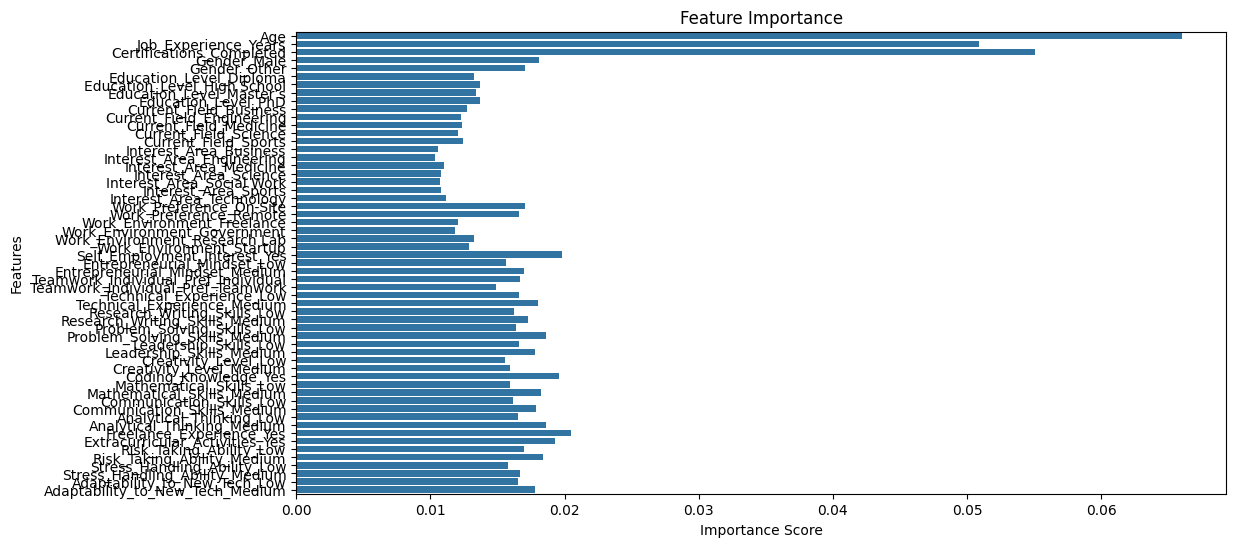

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
features = df_encoded.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()